# Pipeline Speed Test

In [48]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
from lib.segmentation import segmentation_adjacency, FormFeatureExtraction
from lib.segmentation.feature_extraction import form_feature_extraction
from lib.graph import coarsen_adj, perm_features

def pipeline(image, segmentation_algorithm):
    t_segmentation = time.process_time()
    segmentation = segmentation_algorithm(image)
    t_segmentation = time.process_time() - t_segmentation
    
    t_adjacency = time.process_time()
    adj, points, mass = segmentation_adjacency(segmentation)
    t_adjacency = time.process_time() - t_adjacency
    
    t_coarsen = time.process_time() 
    adjs_dist, adjs_rad, perm = coarsen_adj(adj, points, mass, levels=4)
    t_coarsen = time.process_time() - t_coarsen
    
    t_features = time.process_time()
    features = FormFeatureExtraction(segmentation).get_features()
    t_features = time.process_time() - t_features
    
    t_perm = time.process_time()
    features = perm_features(features, perm)
    t_perm = time.process_time() - t_perm
    
    t_all = t_segmentation + t_adjacency + t_coarsen + t_features + t_perm
    
    p_segmentation = 100 * t_segmentation / t_all
    p_adjacency = 100 * t_adjacency / t_all
    p_coarsen = 100 * t_coarsen / t_all
    p_features = 100 * t_features / t_all
    p_perm = 100 * t_perm / t_all
    
    print('Number of nodes: {}'.format(features.shape[0]))
    print('Execution time: {:.5f}s'.format(t_all))
    print('0. Segmentation: {:.5f}s, {:.2f}%'.format(t_segmentation, p_segmentation))
    print('1. Adjacency generation: {:.5f}s, {:.2f}%'.format(t_adjacency, p_adjacency))
    print('2. Coarsening: {:.5f}s, {:.2f}%'.format(t_coarsen, p_coarsen))
    print('3. Feature extraction: {:.5f}s, {:.2f}%'.format(t_features, p_features))
    print('4. Feature permutation: {:.5f}s, {:.2f}%'.format(t_perm, p_perm))
    
    plt.bar(range(5), [p_segmentation, p_adjacency, p_coarsen, p_features, p_perm], color="black")

## Load Datasets

In [50]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
>> Reading ../test_data/VOCdevkit/VOC2012 100.00%


In [51]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Number of nodes: 80
Execution time: 0.01517s
0. Segmentation: 0.00354s, 23.35%
1. Adjacency generation: 0.00069s, 4.57%
2. Coarsening: 0.00927s, 61.10%
3. Feature extraction: 0.00164s, 10.84%
4. Feature permutation: 0.00002s, 0.15%


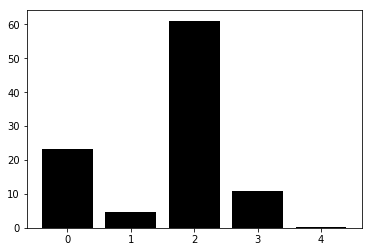

In [52]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
pipeline(mnist, slic)

## MNIST Quickshift

Number of nodes: 96
Execution time: 0.02412s
0. Segmentation: 0.01202s, 49.84%
1. Adjacency generation: 0.00065s, 2.68%
2. Coarsening: 0.00972s, 40.32%
3. Feature extraction: 0.00170s, 7.05%
4. Feature permutation: 0.00003s, 0.10%


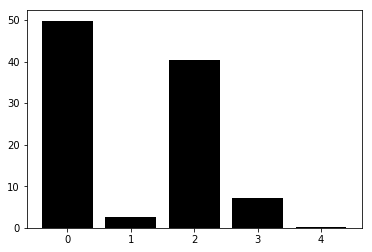

In [53]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
pipeline(mnist, quickshift)

## Cifar10 SLIC

Number of nodes: 144
Execution time: 0.01825s
0. Segmentation: 0.00415s, 22.71%
1. Adjacency generation: 0.00064s, 3.52%
2. Coarsening: 0.01166s, 63.90%
3. Feature extraction: 0.00177s, 9.72%
4. Feature permutation: 0.00003s, 0.15%


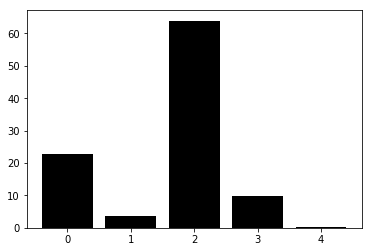

In [54]:
slic = slic_fixed(num_segments=150, compactness=5, max_iterations=10, sigma=0)
pipeline(cifar_10, slic)

## Cifar10 Quickshift

Number of nodes: 208
Execution time: 0.02456s
0. Segmentation: 0.00787s, 32.06%
1. Adjacency generation: 0.00074s, 3.03%
2. Coarsening: 0.01397s, 56.87%
3. Feature extraction: 0.00194s, 7.91%
4. Feature permutation: 0.00003s, 0.13%


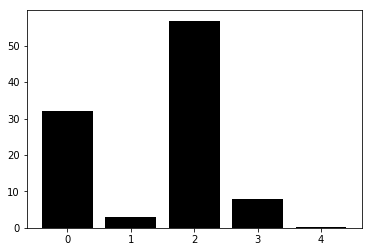

In [55]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
pipeline(cifar_10, quickshift)

## PascalVOC SLIC

Number of nodes: 944
Execution time: 0.35617s
0. Segmentation: 0.22670s, 63.65%
1. Adjacency generation: 0.01206s, 3.38%
2. Coarsening: 0.03546s, 9.96%
3. Feature extraction: 0.08111s, 22.77%
4. Feature permutation: 0.00084s, 0.24%


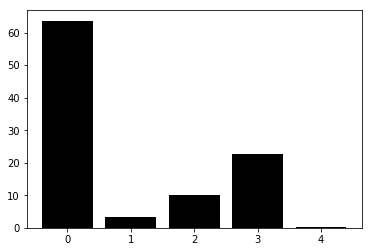

In [56]:
slic = slic_fixed(num_segments=800, compactness=30, max_iterations=10, sigma=0)
pipeline(pascal_voc, slic)

## PascalVOC Quickshift

Number of nodes: 608
Execution time: 1.47266s
0. Segmentation: 1.34921s, 91.62%
1. Adjacency generation: 0.01152s, 0.78%
2. Coarsening: 0.02956s, 2.01%
3. Feature extraction: 0.08232s, 5.59%
4. Feature permutation: 0.00006s, 0.00%


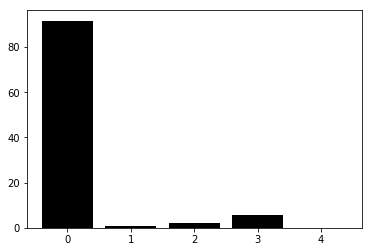

In [57]:
quickshift = quickshift_fixed(ratio=1, kernel_size=3, max_dist=15, sigma=0)
pipeline(pascal_voc, quickshift)